<a href="https://colab.research.google.com/github/iamsonia9/Web_scrap/blob/main/KNN_Assignment13(Sonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [351]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [353]:
df = pd.read_csv("/content/Social_Network_Ads (1).csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [354]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [355]:
X = df.iloc[:,2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [356]:
X.shape

(400, 2)

In [357]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [358]:
y.shape

(400,)

**Splitting the dataset into the Training set and Test set**

In [359]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [360]:
X_train.shape

(280, 2)

In [361]:
X_test.shape

(120, 2)

**Feature Scaling**

In [362]:
from sklearn.preprocessing import StandardScaler

In [363]:
sc_x = StandardScaler()

In [364]:
X_train = sc_x.fit_transform(X_train)

In [365]:
X_test = sc_x.transform(X_test)

In [366]:
X_train

array([[-0.09007474, -0.57490228],
       [-0.27899555, -1.3080624 ],
       [ 1.70467295,  1.6245781 ],
       [-1.69590163,  0.18758426],
       [ 1.04345012,  1.44861967],
       [-0.37345596,  1.27266124],
       [ 1.32683133,  2.24043261],
       [-0.37345596, -0.28163823],
       [ 1.04345012, -1.16143038],
       [-0.56237677,  0.04095223],
       [-1.1291392 , -1.07345116],
       [-0.65683717,  1.09670281],
       [ 0.57114809,  1.85918935],
       [-0.18453515,  0.15825785],
       [ 1.32683133,  1.88851575],
       [ 0.00438566, -0.36961744],
       [-1.2235996 ,  0.56882752],
       [ 0.85452931, -1.22008319],
       [-0.56237677, -1.60132645],
       [-1.60144122,  0.12893145],
       [-0.56237677, -1.51334724],
       [ 2.17697497, -0.6922079 ],
       [ 0.38222728, -0.19365901],
       [ 2.17697497, -0.80951352],
       [-0.56237677,  0.56882752],
       [ 1.51575214,  0.07027864],
       [ 0.85452931,  1.38996686],
       [-0.37345596, -1.22008319],
       [ 0.19330647,

In [367]:
X_test

array([[ 0.85452931, -1.36671521],
       [ 0.28776688, -0.36961744],
       [ 1.23237093, -0.98547195],
       [-1.03467879, -0.78018711],
       [-0.84575798,  1.56592529],
       [-0.84575798,  0.56882752],
       [-1.03467879, -0.51624947],
       [ 0.00438566,  0.04095223],
       [-0.75129758,  0.15825785],
       [ 0.28776688,  0.15825785],
       [ 0.94898971, -1.45469443],
       [-0.27899555,  1.33131405],
       [ 0.47668769, -0.1350062 ],
       [ 0.47668769,  1.12602922],
       [-0.09007474, -1.07345116],
       [ 0.09884607, -0.54557587],
       [ 0.19330647,  0.04095223],
       [-1.41252041, -1.51334724],
       [ 0.19330647, -0.80951352],
       [-1.2235996 , -1.10277757],
       [ 1.89359376, -0.28163823],
       [ 0.94898971, -0.60422868],
       [ 0.38222728, -0.51624947],
       [ 1.70467295, -0.89749273],
       [ 0.19330647,  1.06737641],
       [ 0.28776688,  0.24623707],
       [-1.03467879,  0.48084831],
       [ 0.19330647,  0.27556347],
       [-0.46791636,

In [368]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Fitting K-NN to the Training set**

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test) 

0.9

**Predicting the Test set results**

In [370]:
from sklearn.metrics import roc_auc_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

K value  :  1  train score :  1.0  cv score :  0.8428571428571429
K value  :  2  train score :  0.9214285714285714  cv score :  0.8071428571428572
K value  :  3  train score :  0.925  cv score :  0.8857142857142856
K value  :  4  train score :  0.9214285714285714  cv score :  0.8785714285714287
K value  :  5  train score :  0.925  cv score :  0.9071428571428571
K value  :  6  train score :  0.9142857142857143  cv score :  0.8892857142857142
K value  :  7  train score :  0.9107142857142857  cv score :  0.9035714285714287
K value  :  8  train score :  0.9071428571428571  cv score :  0.8857142857142858
K value  :  9  train score :  0.9142857142857143  cv score :  0.8964285714285716
K value  :  10  train score :  0.9071428571428571  cv score :  0.8928571428571429
K value  :  20  train score :  0.9035714285714286  cv score :  0.8964285714285716
K value  :  50  train score :  0.8607142857142858  cv score :  0.8392857142857142


0.9166666666666666

In [371]:
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

**Making the Confusion Matrix**

In [372]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve,roc_auc_score,confusion_matrix, f1_score

In [373]:
confusion_matrix(y_test,y_pred)

array([[62,  5],
       [ 5, 48]])

In [374]:
knn.score(X_test,y_test)

0.9166666666666666

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


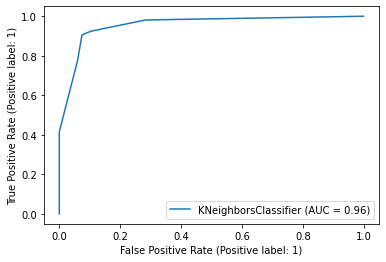

In [375]:
plot_roc_curve(knn, X_test, y_test)